<a href="https://colab.research.google.com/github/oktsadwikar/DPDM2023/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPLICATION OF DBSCAN**

Using Aggregation Benchmark Dataset

**Aggregation benchmark dataset** is an artificial data or Synthetic data which means an information that's artificially manufactured rather than generated by real-world events. There are two features in this dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing**

In [2]:
# Install the important package
import pandas as pd
import numpy as np

### Import the dataset

In [3]:
col_name = ['Feature 1','Feature 2']

In [4]:
data = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/Aggregation.csv',header = None,names=col_name)

In [5]:
data

,Feature 1,Feature 2
0,0.367470,0.981618
1,0.347892,0.941176
2,0.334337,0.970588
3,0.325301,0.987132
4,0.313253,0.959559
...,...,...
783,0.134036,0.051471
784,0.141566,0.029412
785,0.155120,0.047794
786,0.143072,0.058824


### Eyeball the data

In [6]:
data.shape

(788, 2)

The data contains of 788 rows or records and 2 features.

### Descriptive statistics

In [7]:
data.describe()

,Feature 1,Feature 2
count,788.000000,788.000000
mean,0.488458,0.449330
std,0.298857,0.297415
min,0.000000,0.000000
25%,0.234940,0.187040
50%,0.448042,0.359375
75%,0.823795,0.735754
max,1.000000,1.000000


There are 788 count in feature 1 and feature 2, this indicates there is no missing value of the data. The mean or average of Feature 1 is 0.488458 while the mean of Feature 2 is 0.449330. The values of Feature 1 and Feature 2 are in the range 0 to 1. The standard deviation of Feature 1 is 0.298857 and the standard deviation of Feature 2 is 0.297415.

### Check Missing Value

In [8]:
data.isnull().any()

Feature 1    False
Feature 2    False
dtype: bool

The output above shows that there is no outlier in the data.

### Plotting the data

In [9]:
# Import package for plotting
import matplotlib.pyplot as plt
import matplotlib

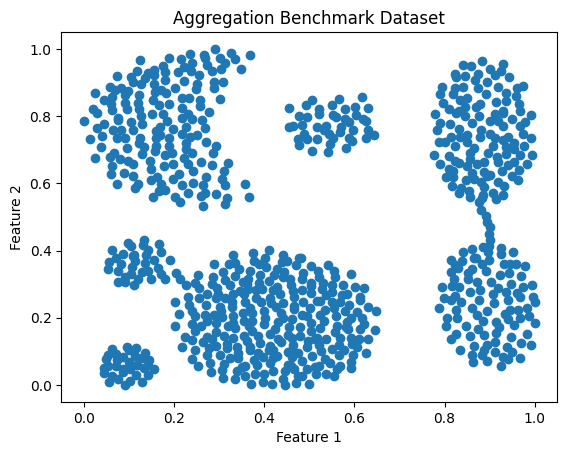

In [16]:
plt.scatter(data['Feature 1'], data['Feature 2'])
plt.title('Aggregation Benchmark Dataset',fontsize=12)
plt.ylabel("Feature 2")
plt.xlabel("Feature 1");

The plot above is a scatter plot of Aggregation Benchmark dataset, where feature 1 is the x-axis and feature 2 is the y-axis. The plot shows that the data has an arbitrary shape.

## DBSCAN

### Find suitable parameter Eps and MinPts

MinPts >= Dimensions + 1 or sometimes MinPts = 2*Dimensions

Eps -> To determine the optimal ε parameter, compute the k-nearest neighbor (kNN) distances (average distance of every data point to its k-nearest neighbors) of an input dataset using the k-nearest neighbor method (unsupervised nearest neighbors learning).

In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(data)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data)

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

plot the K-distance graph and find the value of epsilon.

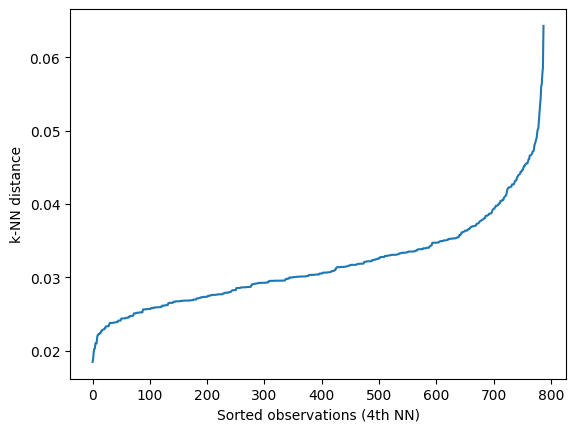

In [19]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

The optimal value of epsilon can be found at the point of maximum curvature in the K-Distance Graph. This means that we should look for the point on the graph where the slope changes most abruptly, which indicates a significant change in density. This point is known as the "Knee" of the graph.

In [20]:
!pip install --upgrade kneed

To get an estimate of knee point, use the KneeLocator() function from the kneed package.

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.04712544875174265


Get the optimal eps is 0.04712544875174265.

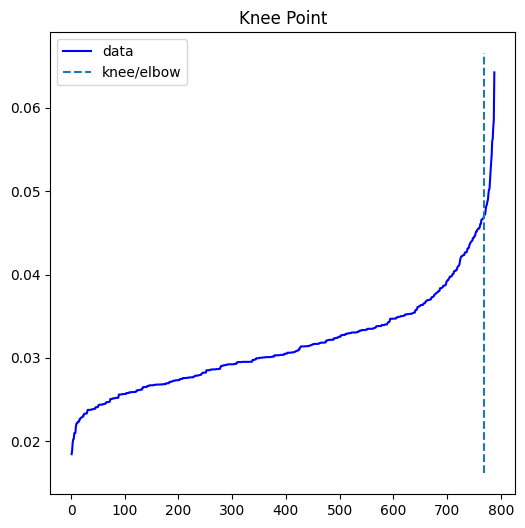

In [ ]:
kneedle.plot_knee()
plt.show()

Then, use eps = 0.04712544875174265 and MinPts = 4 to do the DBSCAN Clustering

### Compute DBSCAN Clustering

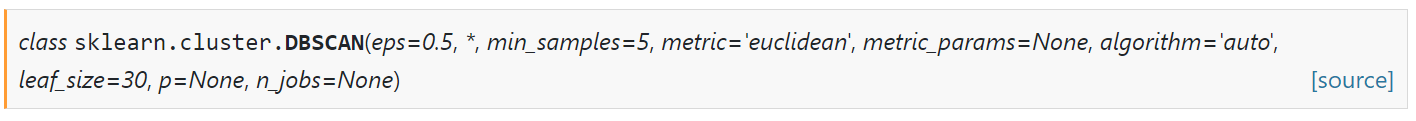

In [21]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 0.047, min_samples = 4).fit(data)

# get cluster labels
clusters.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [22]:
# add the cluster labels into the data
data['cluster']=clusters.labels_
data

,Feature 1,Feature 2,cluster
0,0.367470,0.981618,0
1,0.347892,0.941176,0
2,0.334337,0.970588,0
3,0.325301,0.987132,0
4,0.313253,0.959559,0
...,...,...,...
783,0.134036,0.051471,4
784,0.141566,0.029412,4
785,0.155120,0.047794,4
786,0.143072,0.058824,4


In [23]:
# check unique clusters
data['cluster'].value_counts()

 1    307
 2    232
 0    169
 3     45
 4     34
-1      1
Name: cluster, dtype: int64

There are 5 cluster (0,1,2,3, and 4). cluster labels -1 indicates a noise point, in this dataset there is 1 noise point.

### Visualization

In [25]:
import plotly.express as px

fig = px.scatter(data, x="Feature 1", y="Feature 2", color="cluster")

fig

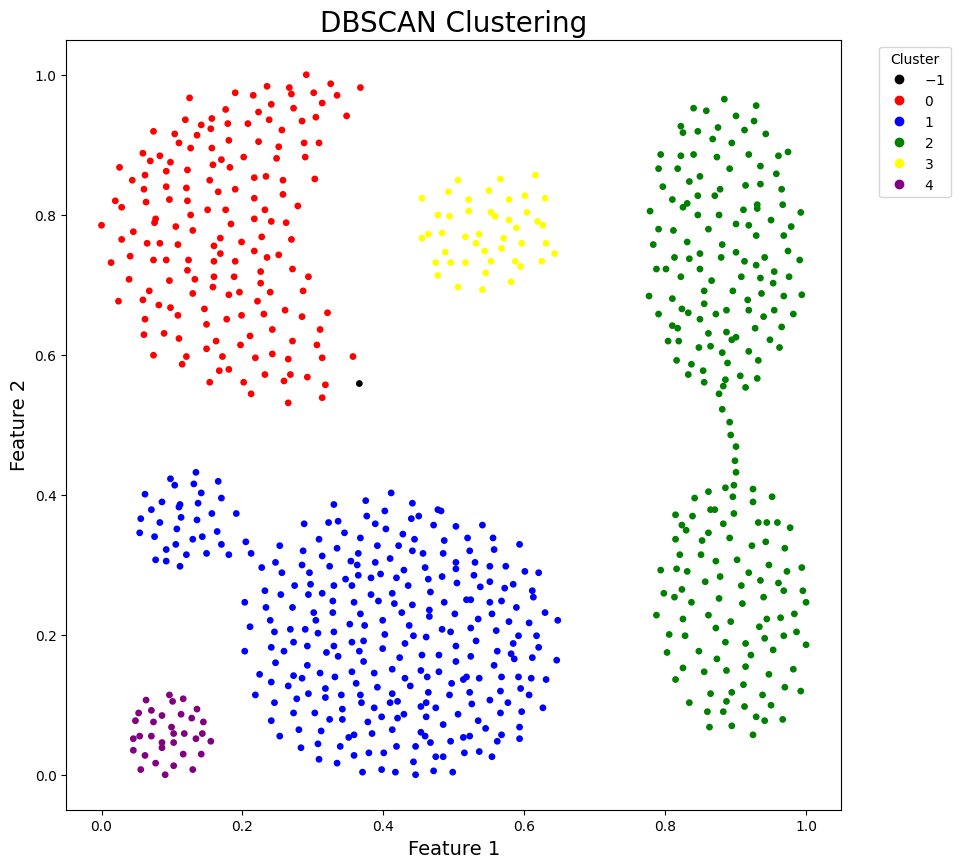

In [38]:
# Visualizing the cluster

colors=['black','red','blue','green','yellow','purple']
plt.figure(figsize=(10,10))
scatter = plt.scatter(data['Feature 1'],data['Feature 2'],c=data['cluster'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title='Cluster', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

Different color indicates different cluster, the plot shows that there are 4 clusters. Points with red color is a cluster "0", points with blue color is a cluster "1", points with green color is a cluster "2", points with yellow color is a cluster "3", points with purple color is a cluster "4", and point with black color is a noise point.

### silhouette score

Silhouette Coefficient or silhouette score is used to calculate the goodness of a clustering technique. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [39]:
from sklearn.metrics import silhouette_score as ss

x = data[['Feature 1','Feature 2']].to_numpy()
ss(x, data['cluster'])

0.28337466235437625

The silhouette score for this clustering is 0.28, it means that the clusters seems a good one.